# Build the Binary Logistic Model

In [18]:
# Import Libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt

import os

os.chdir(r"C:\Users\willi\GitHub\APM_low_infant_birth_wt_PY\data\processed")


In [6]:
# Load Data
birth_wt_data = pd.read_csv("birth_wt_clean.csv")
print("✅ Data loaded successfully")

✅ Data loaded successfully


In [22]:
print(birth_wt_data.head())

   sr_no    id  low   age    lwt  race  smoke  ptl   ht   ui  ftv
0    1.0  85.0  0.0  19.0  182.0   2.0    0.0  0.0  0.0  0.0  0.0
1    2.0  86.0  0.0  33.0  155.0   3.0    0.0  0.0  0.0  0.0  3.0
2    3.0  87.0  0.0  20.0  105.0   1.0    1.0  0.0  0.0  0.0  1.0
3    4.0  88.0  0.0  21.0  108.0   1.0    1.0  0.0  0.0  1.0  2.0
4    5.0  89.0  0.0  18.0  107.0   1.0    1.0  0.0  0.0  1.0  0.0


In [23]:
# selected features

selected_features = ["age", "lwt", "race", "smoke", "ptl", "ht", "ui", "ftv"]


In [7]:
# Define Features and Target
y = birth_wt_data["low"]

# Independent variables
X = birth_wt_data.drop(columns=["low"])

In [24]:
# Drop all other columns except the selected features
X = birth_wt_data[selected_features]
y = birth_wt_data["low"]

In [25]:
# Train-Test Split (80/20)

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)
  
print("✅ Train-Test Split completed successfully")

✅ Train-Test Split completed successfully


In [26]:
# Scale Features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
print("✅ Features scaled successfully")

✅ Features scaled successfully


In [28]:
# Fit Logistic Regression Model
logreg_selected = LogisticRegression()
logreg_selected.fit(X_train_scaled, y_train)

LogisticRegression()

In [29]:
# Model Summary

y_pred = logreg_selected.predict(X_test_scaled)

print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Optional: Coefficient Table


coef_df = pd.DataFrame({
    "Feature": selected_features,
    "Coefficient": logreg_selected.coef_[0]
}).sort_values(by="Coefficient", key=abs, ascending=False)

print(coef_df)

Confusion Matrix:
[[26  0]
 [ 9  3]]

Classification Report:
              precision    recall  f1-score   support

         0.0       0.74      1.00      0.85        26
         1.0       1.00      0.25      0.40        12

    accuracy                           0.76        38
   macro avg       0.87      0.62      0.63        38
weighted avg       0.82      0.76      0.71        38

  Feature  Coefficient
3   smoke     0.422931
2    race     0.404149
5      ht     0.390333
6      ui     0.285877
1     lwt    -0.219737
4     ptl     0.186786
7     ftv    -0.127036
0     age     0.032151


Generate three classification tables with cut-off values 0.4, 0.3 and 0.55.

In [30]:
# Threshold Evaluation for Logistic Regression

# Get predicted probabilities for class 1 (low birth weight)

y_proba = logreg.predict_proba(X_test_scaled)[:, 1]

In [31]:
# Define a Function to Generate the Classification Table & Metrics


def evaluate_threshold(y_true, y_prob, threshold):
    y_pred_thresh = (y_prob >= threshold).astype(int)
    tn, fp, fn, tp = confusion_matrix(y_true, y_pred_thresh).ravel()

    sensitivity = tp / (tp + fn) if (tp + fn) > 0 else 0
    specificity = tn / (tn + fp) if (tn + fp) > 0 else 0
    misclassification_rate = (fp + fn) / (tp + tn + fp + fn)

    print(f"\nThreshold: {threshold}")
    print("----------------------------")
    print(f"Confusion Matrix:\n[[TN: {tn}, FP: {fp}]\n [FN: {fn}, TP: {tp}]]")
    print(f"Sensitivity (Recall for 1): {sensitivity:.2f}")
    print(f"Specificity (Recall for 0): {specificity:.2f}")
    print(f"Misclassification Rate:     {misclassification_rate:.2f}")
    
    return {
        "Threshold": threshold,
        "Sensitivity": sensitivity,
        "Specificity": specificity,
        "Misclassification Rate": misclassification_rate
    }


In [32]:
# Run the Function for Different Thresholds

results = []
for t in [0.4, 0.3, 0.55]:
    metrics = evaluate_threshold(y_test, y_proba, threshold=t)
    results.append(metrics)

# Convert to a DataFrame for easy viewing
thresholds = pd.DataFrame(results)
thresholds


Threshold: 0.4
----------------------------
Confusion Matrix:
[[TN: 25, FP: 1]
 [FN: 7, TP: 5]]
Sensitivity (Recall for 1): 0.42
Specificity (Recall for 0): 0.96
Misclassification Rate:     0.21

Threshold: 0.3
----------------------------
Confusion Matrix:
[[TN: 19, FP: 7]
 [FN: 6, TP: 6]]
Sensitivity (Recall for 1): 0.50
Specificity (Recall for 0): 0.73
Misclassification Rate:     0.34

Threshold: 0.55
----------------------------
Confusion Matrix:
[[TN: 26, FP: 0]
 [FN: 11, TP: 1]]
Sensitivity (Recall for 1): 0.08
Specificity (Recall for 0): 1.00
Misclassification Rate:     0.29


,Threshold,Sensitivity,Specificity,Misclassification Rate
0,0.40,0.416667,0.961538,0.210526
1,0.30,0.500000,0.730769,0.342105
2,0.55,0.083333,1.000000,0.289474


In [33]:
# ROC curve data

# Predict probabilities for the positive class (low birth weight = 1)
y_scores = logreg.predict_proba(X_test_scaled)[:, 1]

# Calculate False Positive Rate, True Positive Rate, Thresholds
fpr, tpr, thresholds = roc_curve(y_test, y_scores)


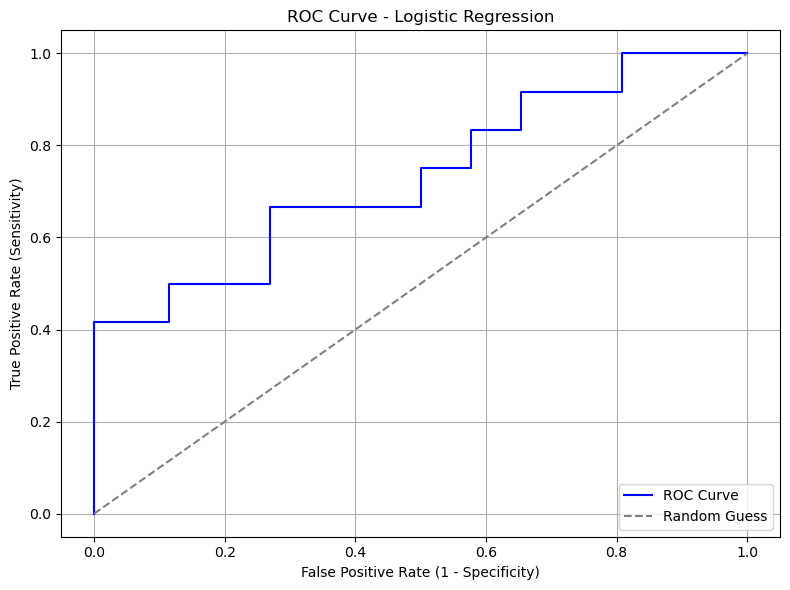

In [34]:
# Plot the ROC curve

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label="ROC Curve", color="blue")
plt.plot([0, 1], [0, 1], linestyle='--', color='gray', label="Random Guess")
plt.xlabel("False Positive Rate (1 - Specificity)")
plt.ylabel("True Positive Rate (Sensitivity)")
plt.title("ROC Curve - Logistic Regression")
plt.legend(loc="lower right")
plt.grid(True)
plt.tight_layout()
plt.show()



In [35]:
# Area Under the Curve (AUC)
auc = roc_auc_score(y_test, y_scores)
print(f"AUC: {auc:.2f}")

AUC: 0.73
